In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


# computing the predictions
def predict(X, w):
    return np.matmul(X, w)


# calculating the loss
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)


def gradient(X, Y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]


def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w


# Import the dataset
data = np.loadtxt("pizza_3_vars.txt", skiprows=1)
X = data[:, :-1]
X = np.hstack([np.ones((X.shape[0], 1)), X])
Y = data[:, -1].reshape(-1, 1)

print(X.shape)
print(Y.shape)

w = train(X, Y, iterations=50000, lr=0.001)

(30, 4)
(30, 1)
Iteration    0 => Loss: 1333.56666666666660603369
Iteration    1 => Loss: 152.37148173674077611395
Iteration    2 => Loss: 65.17252143398702912691
Iteration    3 => Loss: 57.29348107043313831355
Iteration    4 => Loss: 55.24408375010616367717
Iteration    5 => Loss: 53.69548034496939692417
Iteration    6 => Loss: 52.25567333361473743025
Iteration    7 => Loss: 50.89073275996361189755
Iteration    8 => Loss: 49.59315053477826751305
Iteration    9 => Loss: 48.35777747932070980141
Iteration   10 => Loss: 47.18003972981341576087
Iteration   11 => Loss: 46.05577241746296834890
Iteration   12 => Loss: 44.98117392026742322741
Iteration   13 => Loss: 43.95277197431995830357
Iteration   14 => Loss: 42.96739348065429453527
Iteration   15 => Loss: 42.02213715248831249482
Iteration   16 => Loss: 41.11434870159362731101
Iteration   17 => Loss: 40.24159832491247357211
Iteration   18 => Loss: 39.40166027726748865234
Iteration   19 => Loss: 38.59249433612597357524
Iteration   20 => Los

In [24]:
print(w)

[[ 2.32966172]
 [ 1.23135282]
 [-0.02111842]
 [ 3.12372705]]


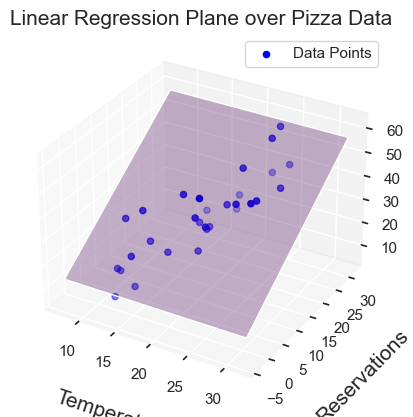

In [25]:
x1 = X[:, 2]  # Temperature
x2 = X[:, 1]  # Reservations
y = Y[:, 0]   # Pizzas (flattened for plotting)

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Temperature", labelpad=15, fontsize=15)
ax.set_ylabel("Reservations", labelpad=15, fontsize=15)
ax.set_zlabel("Pizzas", labelpad=10, fontsize=15)

# Plot the data points
ax.scatter3D(x1, x2, y, color='blue', label='Data Points')

# Plot the regression plane
MARGIN = 5
edges_x1 = np.linspace(np.min(x1) - MARGIN, np.max(x1) + MARGIN, 2)
edges_x2 = np.linspace(np.min(x2) - MARGIN, np.max(x2) + MARGIN, 2)
xs, ys = np.meshgrid(edges_x1, edges_x2)

# Calculate zs using the model: z = w0 + w1*x2 + w2*x1
# (Reservations = x2, Temperature = x1)
zs = w[0] + w[1] * ys + w[2] * xs + w[3] * np.mean(X[:, 3])  # Keep 'Tourists' constant for 3D plot

ax.plot_surface(xs, ys, zs, alpha=0.3, cmap=cm.viridis)
ax.legend()
plt.title("Linear Regression Plane over Pizza Data", fontsize=15)
plt.show()